In [1]:
import reader
data = reader.Data()

Local data read/write folder path:
	Default path: /Users/Dan/2017 spring/MATH 497/code and data/data/

Data: all_person_data 
File: all_person_data_Dan_20170415.pickle
File already exists.

Data: systemic_disease_list 
File: systemic_disease_list.pickle
File already exists.

Data: morefeatures_missingHandled 
File: Morefeatures_missingHandled_Dan_20170415.pickle
File already exists.

Data: morefeatures_raw 
File: Morefeatures_raw_Dan_20170415.pickle
File already exists.

Data: refractive_index 
File: 2017_03_30_refractive_index_columns.pickle
File already exists.

Data: demographics 
File: demographics_Dan_20170304.pickle
File already exists.

Data: visual_accuity 
File: 2017_03_30_visual_acuity_columns.pickle
File already exists.

Data: SNOMED_problem_list 
File: SNOMED_problem_list.pickle
File already exists.

Data: family_hist_for_Enc 
File: family_hist_for_Enc.pickle
File already exists.

Data: family_hist_list 
File: family_hist_list.pickle
File already exists.

Data: person_profi

In [2]:
DR_to_vis_dict = {'PDR': 'vision_threatening', 
                  'SNPDR': 'vision_threatening',
                  'MNPDR': 'non_vision_threatening',
                  'mNPDR': 'non_vision_threatening', 
                  'no_DR': 'no_DR'}

In [3]:
d = dict()
X = dict()
y = dict()

In [4]:
d['base'] = data['baseline_missingHandled']
d['base'].head()

A1C        BMI     Glucose  BP_Diastolic  BP_Systolic     DM  \
Person_Nbr                                                                      
33          8.000000  31.579036  130.000000     78.000000   118.000000   True   
89          7.280372  32.452934  133.443515     53.000000    92.000000   True   
146         6.989072  31.129173  128.568645     75.000000   130.000000   True   
196         7.280372  32.452934   78.000000     88.000000   125.000000  False   
327         7.203035  31.579036  121.000000     78.082412   134.756106  False   

               ME Glaucoma_Suspect Open_angle_Glaucoma Cataract    ...      \
Person_Nbr                                                         ...       
33          False            False               False    False    ...       
89          False             True               False    False    ...       
146         False             True               False     True    ...       
196         False            False               False    False    ...       
327         False             True               False    False    ...       

            Race_Other  Race_White  Age_group_(18, 48]  Age_group_(49, 55]  \
Person_Nbr                                                                   
33                   0           0                   0                   0   
89                   1           0                   0                   0   
146                  1           0                   0                   0   
196                  1           0                   0                   0   
327                  0           0                   0                   0   

            Age_group_(56, 60]  Age_group_(61, 66]  Age_group_(67, 74]  \
Person_Nbr                                                               
33                           0                   1                   0   
89                           1                   0                   0   
146                          0                   0                   1   
196                          1                   0                   0   
327                          0                   1                   0   

            Age_group_(75, 114]  worst_DR  recent_DR  
Person_Nbr                                            
33                            0     no_DR      no_DR  
89                            0     no_DR      no_DR  
146                           0     no_DR      no_DR  
196                           0     no_DR      no_DR  
327                           0     no_DR      no_DR  

[5 rows x 26 columns]

In [5]:
X['base'] = d['base'].drop(['worst_DR', 'recent_DR'], axis=1)
print(X['base'].shape[1])
y['base_recent_DR'] = d['base']['recent_DR']
y['base_recent_vis'] = d['base']['recent_DR'].map(lambda x: DR_to_vis_dict[x])

24


In [6]:
d['more'] = data['morefeatures_missingHandled']
d['more'].head()

A1C        BMI     Glucose  BP_Systolic  BP_Diastolic  \
Person_Nbr                                                               
33          8.000000  31.579036  130.000000   118.000000     78.000000   
89          7.280372  32.452934  133.443515    92.000000     53.000000   
146         6.989072  31.129173  128.568645   130.000000     75.000000   
196         7.280372  32.452934   78.000000   125.000000     88.000000   
327         7.203035  31.579036  121.000000   134.756106     78.082412   

            MR_OD_SPH_Numeric  MR_OD_CYL_Numeric  MR_OS_SPH_Numeric  \
Person_Nbr                                                            
33                   1.250000          -0.913393           1.750000   
89                   0.500000          -0.750000           0.250000   
146                  0.802648          -0.941888           0.767671   
196                  1.750000          -0.750000           0.750000   
327                  1.250000          -0.750000           3.000000   

            MR_OS_CYL_Numeric  MR_OS_DVA_ability    ...      family_G_P_NG  \
Person_Nbr                                          ...                      
33                  -0.500000          20.000000    ...                  0   
89                  -1.250000          20.000000    ...                  0   
146                 -0.929986          22.279976    ...                  0   
196                 -0.873557          20.000000    ...                  1   
327                 -1.000000          25.000000    ...                  1   

            family_G_Unknown  Age_group_(18, 48] Age_group_(49, 55]  \
Person_Nbr                                                            
33                         0                   0                  0   
89                         0                   0                  0   
146                        1                   0                  0   
196                        0                   0                  0   
327                        0                   0                  0   

           Age_group_(56, 60] Age_group_(61, 66] Age_group_(67, 74]  \
Person_Nbr                                                            
33                          0                  1                  0   
89                          1                  0                  0   
146                         0                  0                  1   
196                         1                  0                  0   
327                         0                  1                  0   

           Age_group_(75, 114]  worst_DR  recent_DR  
Person_Nbr                                           
33                           0     no_DR      no_DR  
89                           0     no_DR      no_DR  
146                          0     no_DR      no_DR  
196                          0     no_DR      no_DR  
327                          0     no_DR      no_DR  

[5 rows x 54 columns]

In [7]:
X['more'] = d['more'].drop(['worst_DR', 'recent_DR'], axis=1)
print(X['more'].shape[1])
y['more_recent_DR'] = d['more']['recent_DR']
y['more_recent_vis'] = d['more']['recent_DR'].map(lambda x: DR_to_vis_dict[x])

52


In [8]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np

In [9]:
# Print the top 5 precisions and corresponding tree paramters setting
def parameter_tuning(X, y, folds=5, 
                     min_samples_leaf_min = 5, min_samples_leaf_max = 60, min_samples_leaf_sep = 5,
                     max_depth_min = 5, max_depth_max = 20, max_depth_sep = 5,
                     max_features = None):
    kf = KFold(n_splits=folds)
    a1, a2, a3, a4 = [],[],[],[]
    for min_samples_leaf in range(min_samples_leaf_min, min_samples_leaf_max, min_samples_leaf_sep):
        for max_depth in range(max_depth_min, max_depth_max, max_depth_sep):
                a1.append(min_samples_leaf)
                a2.append(max_depth)
                clf = tree.DecisionTreeClassifier(min_samples_leaf = min_samples_leaf, 
                                                  max_depth = max_depth, 
                                                  max_features = max_features)
                precisions = []
                node_count = []
                for train, test in kf.split(X.index):
                    X_train = X.loc[X.index[train],]
                    X_test = X.loc[X.index[test],]
                    y_train = y.loc[y.index[train],]
                    y_test = y.loc[y.index[test],]
                    clf = clf.fit(X_train, y_train)
                    preds = clf.predict(X = X_test)
                    precisions.append(metrics.precision_score(y_test, preds, average = 'weighted'))
                    node_count.append(clf.tree_.node_count)
                a3.append(np.mean(precisions))
                a4.append(np.mean(node_count))
    print('averaged precision \t min_samples_leaf \t max_depth \t averaged node_count')
    sort_result = sorted(zip(a3,a1,a2,a4), key = lambda x: x[0], reverse=True)
    for i in sort_result[0:6]:
        print('%s\t%s\t%s\t%s' %(i[0], i[1], i[2], i[3]))

In [10]:
from IPython.display import Image 
import pydotplus
def plot_tree(clf, X):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                                    feature_names = X.columns.values,
                                    class_names = clf.classes_,
                                    filled=True, rounded=True) 
    graph = pydotplus.graph_from_dot_data(dot_data)  
    return Image(graph.create_png())

In [11]:
# Source from
# http://stackoverflow.com/questions/39476414/scikit-learn-decision-tree-node-depth
def get_max_node_depths(tree):
    """
    Get the node depths of the decision tree

    >>> d = DecisionTreeClassifier()
    >>> d.fit([[1,2,3],[4,5,6],[7,8,9]], [1,2,3])
    >>> get_node_depths(d.tree_)
    array([0, 1, 1, 2, 2])
    """
    def get_node_depths_(current_node, current_depth, l, r, depths):
        depths += [current_depth]
        if l[current_node] != -1 and r[current_node] != -1:
            get_node_depths_(l[current_node], current_depth + 1, l, r, depths)
            get_node_depths_(r[current_node], current_depth + 1, l, r, depths)

    depths = []
    get_node_depths_(0, 0, tree.children_left, tree.children_right, depths) 
    return max(depths)

In [12]:
# # Source from scikit-learn user guide
# import numpy as np
# n_nodes = clf.tree_.node_count
# children_left = clf.tree_.children_left
# children_right = clf.tree_.children_right
# feature = clf.tree_.feature
# threshold = clf.tree_.threshold


# # The tree structure can be traversed to compute various properties such
# # as the depth of each node and whether or not it is a leaf.
# node_depth = np.zeros(shape=n_nodes)
# is_leaves = np.zeros(shape=n_nodes, dtype=bool)
# stack = [(0, -1)]  # seed is the root node id and its parent depth
# while len(stack) > 0:
#     node_id, parent_depth = stack.pop()
#     node_depth[node_id] = parent_depth + 1

#     # If we have a test node
#     if (children_left[node_id] != children_right[node_id]):
#         stack.append((children_left[node_id], parent_depth + 1))
#         stack.append((children_right[node_id], parent_depth + 1))
#     else:
#         is_leaves[node_id] = True

# print("The binary tree structure has %s nodes and has "
#       "the following tree structure:"
#       % n_nodes)
# for i in range(n_nodes):
#     if is_leaves[i]:
#         print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
#     else:
#         print("%snode=%s test node: go to node %s if X[:, %s] <= %ss else to "
#               "node %s."
#               % (node_depth[i] * "\t",
#                  i,
#                  children_left[i],
#                  feature[i],
#                  threshold[i],
#                  children_right[i],
#                  ))
# print()

# # First let's retrieve the decision path of each sample. The decision_path
# # method allows to retrieve the node indicator functions. A non zero element of
# # indicator matrix at the position (i, j) indicates that the sample i goes
# # through the node j.

# node_indicator = estimator.decision_path(X_test)

# # Similarly, we can also have the leaves ids reached by each sample.

# leave_id = estimator.apply(X_test)

# # Now, it's possible to get the tests that were used to predict a sample or
# # a group of samples. First, let's make it for the sample.

# sample_id = 0
# node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
#                                     node_indicator.indptr[sample_id + 1]]

# print('Rules used to predict sample %s: ' % sample_id)
# for node_id in node_index:
#     if leave_id[sample_id] != node_id:
#         continue

#     if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
#         threshold_sign = "<="
#     else:
#         threshold_sign = ">"

#     print("decision id node %s : (X[%s, %s] (= %s) %s %s)"
#           % (node_id,
#              sample_id,
#              feature[node_id],
#              X_test[i, feature[node_id]],
#              threshold_sign,
#              threshold[node_id]))

# # For a group of samples, we have the following common node.
# sample_ids = [0, 1]
# common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
#                 len(sample_ids))

# common_node_id = np.arange(n_nodes)[common_nodes]

# print("\nThe following samples %s share the node %s in the tree"
#       % (sample_ids, common_node_id))
# print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

## Baseline + recent_DR target

Check the unlimited-param condition (total node amount and max depth)

In [13]:
y['base_recent_DR'].value_counts()

no_DR    12009
mNPDR     2214
PDR        964
MNPDR      654
SNPDR      198
Name: recent_DR, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X['base'], y['base_recent_DR'], test_size=0.33)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
preds = clf.predict(X = X_test)
print (clf.tree_.node_count, get_max_node_depths(clf.tree_))

(5809, 39)


In [15]:
sorted(zip(X['base'].columns.values,clf.feature_importances_), key = lambda x: x[1], reverse = True)
# sorted([k for k in zip(X['base'].columns.values,clf.feature_importances_) if k[1]!=0], 
#        key = lambda x: x[1], reverse = True)

[('Glucose', 0.16653631106211084),
 ('BP_Diastolic', 0.15396495366957988),
 ('BP_Systolic', 0.15108021319463474),
 ('BMI', 0.12531146311076258),
 ('ME', 0.093568434453418323),
 ('A1C', 0.084257275854407232),
 ('DM', 0.031155399448558444),
 ('Glaucoma_Suspect', 0.024050556203870026),
 ('Race_Black or African American', 0.022438092466711378),
 ('Race_Other', 0.019406770023319857),
 ('Cataract', 0.018125290793430313),
 ('Open_angle_Glaucoma', 0.01262680852307612),
 ('Age_group_(56, 60]', 0.012333254159590678),
 ('Age_group_(61, 66]', 0.011368678842455456),
 ('Race_Hispanic or Latino', 0.01136367352088955),
 ('Age_group_(49, 55]', 0.010887008657623265),
 ('Gender_F', 0.0091609795555346353),
 ('Gender_M', 0.0089792937416425522),
 ('Age_group_(18, 48]', 0.008775771904645964),
 ('Age_group_(75, 114]', 0.0086858617548550773),
 ('Age_group_(67, 74]', 0.0082360878642456451),
 ('Race_White', 0.0062357837545525307),
 ('Race_Asian', 0.0014520374400849312),
 ('Gender_U', 0.0)]

Tuning the parameters and select the setting that result in relatively larger precision and smaller node amount

In [16]:
# result of auto method for max_features is very unstable 
parameter_tuning(X['base'], y['base_recent_DR'], max_features = 'auto')

/Users/Dan/anaconda/envs/python2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


averaged precision 	 min_samples_leaf 	 max_depth 	 averaged node_count
0.665935506514	15	15	647.4
0.660737891783	20	10	268.2
0.660737201134	25	10	269.0
0.656359123502	5	10	451.8
0.656106677089	45	10	191.8
0.656060031001	10	15	900.6


In [17]:
parameter_tuning(X['base'], y['base_recent_DR'])

averaged precision 	 min_samples_leaf 	 max_depth 	 averaged node_count
0.675629515377	30	15	465.0
0.675578719013	40	10	194.6
0.675284320906	30	10	228.6
0.675197047156	40	15	362.6
0.674919478665	35	10	213.0
0.674128317207	35	15	415.4


In [18]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 40, max_depth = 10)
X_train, X_test, y_train, y_test = train_test_split(X['base'], y['base_recent_DR'], test_size=0.33)
clf = clf.fit(X_train, y_train)
preds = clf.predict(X = X_test)
print(clf.tree_.node_count, clf.n_features_)

(173, 24)


In [19]:
print(pd.crosstab(y_test, preds))
print(metrics.classification_report(y_true = y_test, y_pred = preds))

col_0      MNPDR  PDR  mNPDR  no_DR
recent_DR                          
MNPDR         12   31     29    141
PDR           20   47     56    219
SNPDR          3   13     12     32
mNPDR         20   31     61    626
no_DR          1   15     53   3871
             precision    recall  f1-score   support

      MNPDR       0.21      0.06      0.09       213
        PDR       0.34      0.14      0.20       342
      SNPDR       0.00      0.00      0.00        60
      mNPDR       0.29      0.08      0.13       738
      no_DR       0.79      0.98      0.88      3940

avg / total       0.66      0.75      0.69      5293



/Users/Dan/anaconda/envs/python2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


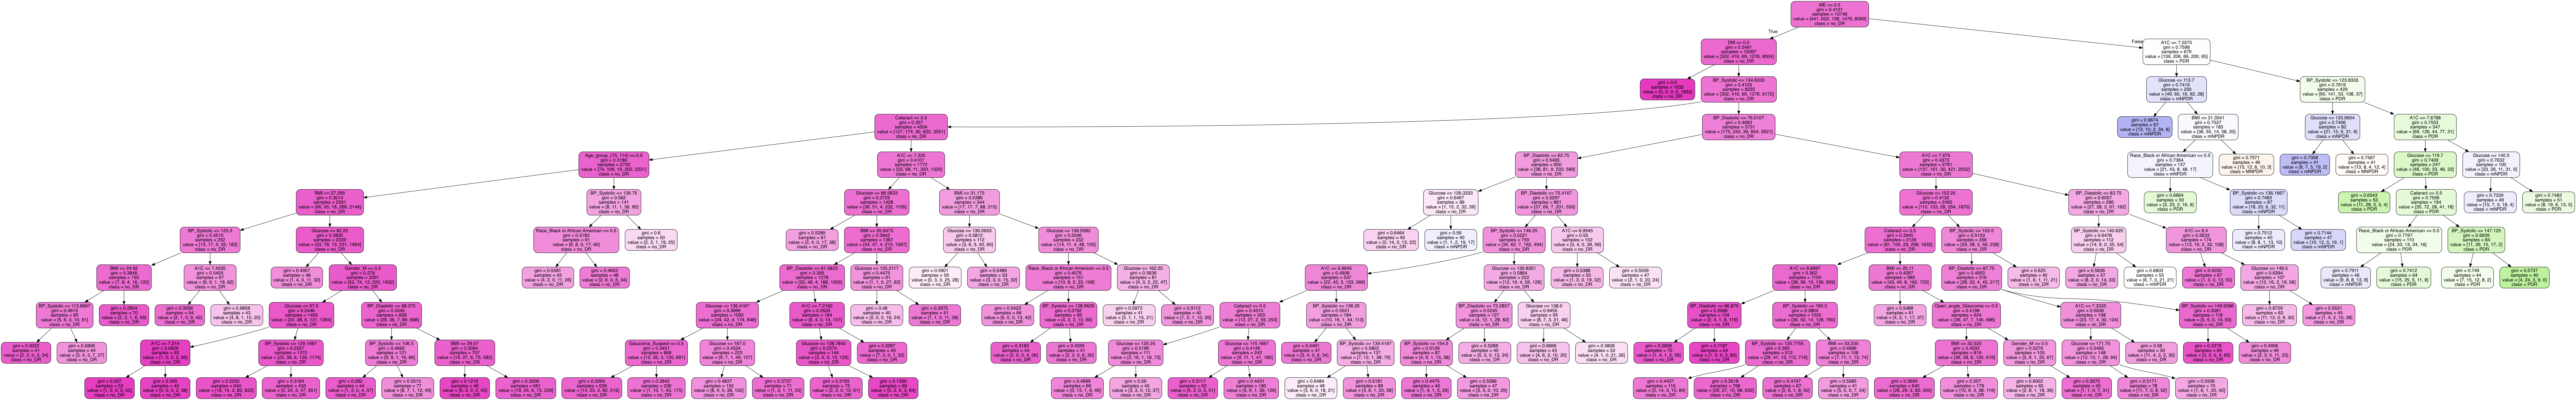

In [20]:
plot_tree(clf, X['base'])

In [21]:
sorted(zip(X['base'].columns.values,clf.feature_importances_), key = lambda x: x[1], reverse = True)

[('ME', 0.52162596246875492),
 ('DM', 0.17828854881983328),
 ('BP_Systolic', 0.068300004617647084),
 ('Glucose', 0.052931504500645224),
 ('A1C', 0.052820518393234588),
 ('BP_Diastolic', 0.045823595336640981),
 ('BMI', 0.026144282413475699),
 ('Cataract', 0.022849708030300578),
 ('Age_group_(75, 114]', 0.013466248432291938),
 ('Race_Black or African American', 0.008325084051376325),
 ('Gender_M', 0.0051748168975745768),
 ('Open_angle_Glaucoma', 0.0029320762753374729),
 ('Glaucoma_Suspect', 0.0013176497628873661),
 ('Gender_F', 0.0),
 ('Gender_U', 0.0),
 ('Race_Asian', 0.0),
 ('Race_Hispanic or Latino', 0.0),
 ('Race_Other', 0.0),
 ('Race_White', 0.0),
 ('Age_group_(18, 48]', 0.0),
 ('Age_group_(49, 55]', 0.0),
 ('Age_group_(56, 60]', 0.0),
 ('Age_group_(61, 66]', 0.0),
 ('Age_group_(67, 74]', 0.0)]

## Baseline + recent_vis target

Check the unlimited-param condition (total node amount and max depth)

In [22]:
y['base_recent_vis'].value_counts()

no_DR                     12009
non_vision_threatening     2868
vision_threatening         1162
Name: recent_DR, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X['base'], y['base_recent_vis'], test_size=0.33)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
preds = clf.predict(X = X_test)
print (clf.tree_.node_count, get_max_node_depths(clf.tree_))

(5181, 34)


In [24]:
sorted(zip(X['base'].columns.values,clf.feature_importances_), key = lambda x: x[1], reverse = True)

[('BP_Diastolic', 0.15498009832277057),
 ('Glucose', 0.14990844829421815),
 ('BP_Systolic', 0.14916566364866718),
 ('BMI', 0.11524361877294804),
 ('ME', 0.10674976365108423),
 ('A1C', 0.088013789834310921),
 ('DM', 0.036561582257966137),
 ('Cataract', 0.022024440704315962),
 ('Glaucoma_Suspect', 0.021346093751037579),
 ('Race_Other', 0.018093626463769812),
 ('Gender_M', 0.017974201135871865),
 ('Race_Black or African American', 0.016364747355424532),
 ('Gender_F', 0.015839446280590818),
 ('Open_angle_Glaucoma', 0.012781700264942819),
 ('Age_group_(61, 66]', 0.012086878532964784),
 ('Age_group_(75, 114]', 0.010327342643209586),
 ('Race_Hispanic or Latino', 0.010321286657164504),
 ('Age_group_(56, 60]', 0.0093120506610134095),
 ('Age_group_(49, 55]', 0.0089576399031729495),
 ('Age_group_(67, 74]', 0.0071456452134018153),
 ('Age_group_(18, 48]', 0.0061184365687932153),
 ('Race_White', 0.0055026820266539898),
 ('Race_Asian', 0.0051808170557071272),
 ('Gender_U', 0.0)]

Tuning the parameters and select the setting that result in relatively larger precision and smaller node amount

In [25]:
parameter_tuning(X['base'], y['base_recent_vis'], max_features = 'auto')

averaged precision 	 min_samples_leaf 	 max_depth 	 averaged node_count
0.708170625022	15	5	43.4
0.705162580674	55	15	215.4
0.705157712206	45	15	265.8
0.704630213159	45	10	171.4
0.704133170356	15	10	303.4
0.703529536106	30	15	387.0


In [26]:
parameter_tuning(X['base'], y['base_recent_vis'])

averaged precision 	 min_samples_leaf 	 max_depth 	 averaged node_count
0.716379223411	15	5	41.0
0.714200517808	45	10	188.6
0.714200517808	45	15	347.4
0.71417684424	50	10	178.6
0.71417684424	50	15	313.4
0.713896922599	10	5	42.6


In [27]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 15, max_depth = 5)
X_train, X_test, y_train, y_test = train_test_split(X['base'], y['base_recent_vis'], test_size=0.33)
clf = clf.fit(X_train, y_train)
preds = clf.predict(X = X_test)
print(clf.tree_.node_count, clf.n_features_)

(37, 24)


In [28]:
print(pd.crosstab(y_test, preds))
print(metrics.classification_report(y_true = y_test, y_pred=preds))

col_0                   no_DR  non_vision_threatening  vision_threatening
recent_DR                                                                
no_DR                    3955                      17                   8
non_vision_threatening    767                      92                  66
vision_threatening        248                      77                  63
                        precision    recall  f1-score   support

                 no_DR       0.80      0.99      0.88      3980
non_vision_threatening       0.49      0.10      0.17       925
    vision_threatening       0.46      0.16      0.24       388

           avg / total       0.72      0.78      0.71      5293



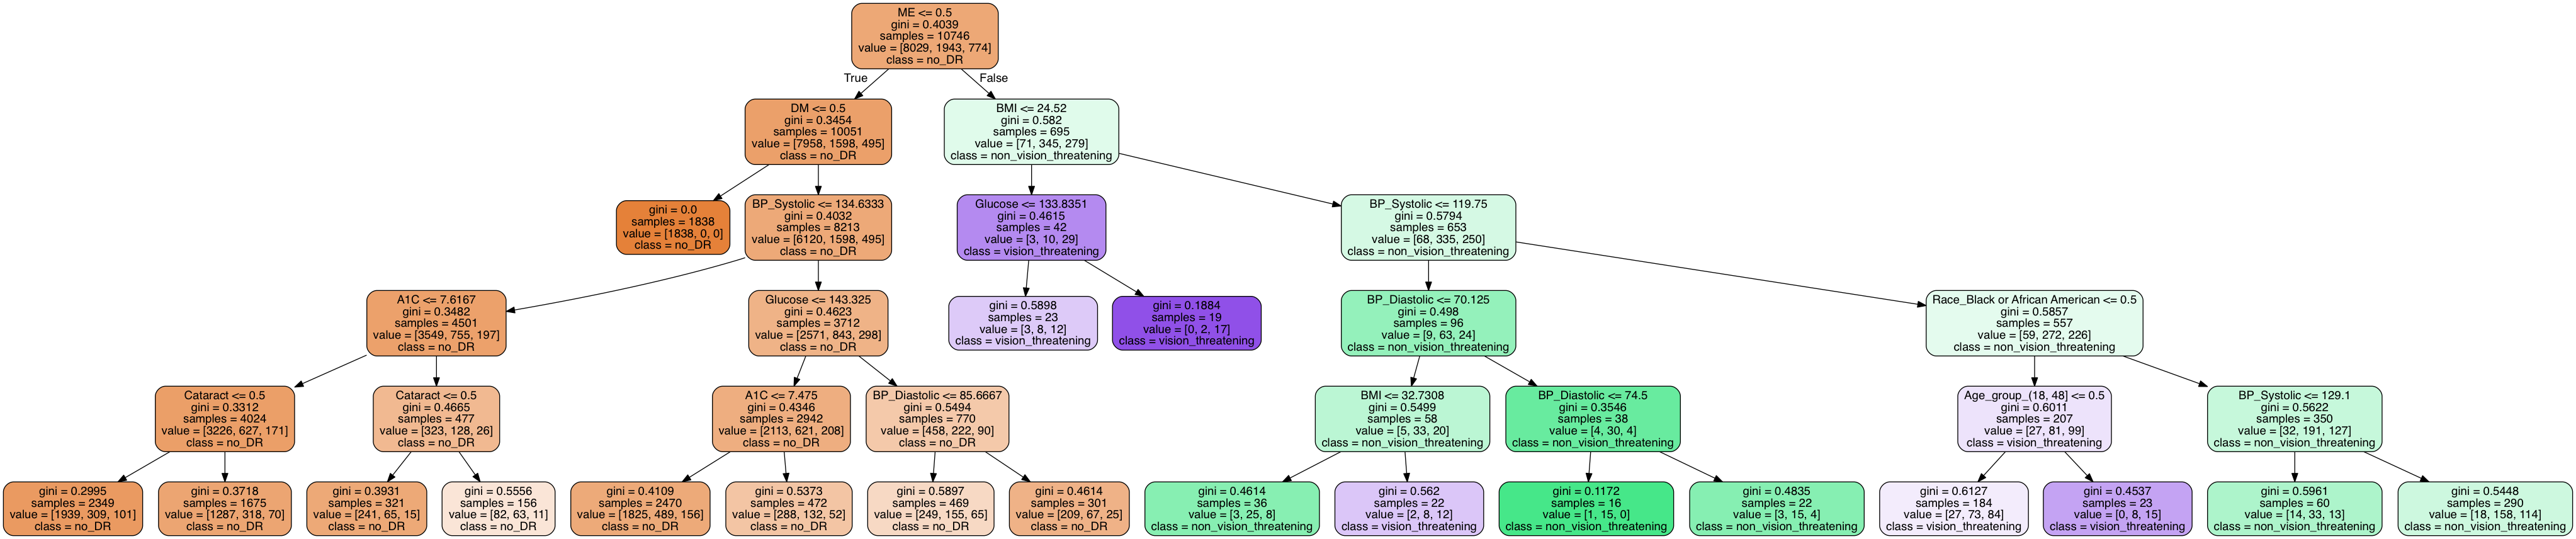

In [29]:
plot_tree(clf, X['base'])

In [30]:
sorted(zip(X['base'].columns.values,clf.feature_importances_), key = lambda x: x[1], reverse = True)

[('ME', 0.62563223893422903),
 ('DM', 0.21564039782663452),
 ('BP_Systolic', 0.048420380998202173),
 ('A1C', 0.029893181224541255),
 ('Glucose', 0.02222293322818087),
 ('Cataract', 0.021786696239376905),
 ('BP_Diastolic', 0.014841261303042665),
 ('BMI', 0.013059877517466189),
 ('Race_Black or African American', 0.0067874448189426005),
 ('Age_group_(18, 48]', 0.0017155879093838692),
 ('Glaucoma_Suspect', 0.0),
 ('Open_angle_Glaucoma', 0.0),
 ('Gender_F', 0.0),
 ('Gender_M', 0.0),
 ('Gender_U', 0.0),
 ('Race_Asian', 0.0),
 ('Race_Hispanic or Latino', 0.0),
 ('Race_Other', 0.0),
 ('Race_White', 0.0),
 ('Age_group_(49, 55]', 0.0),
 ('Age_group_(56, 60]', 0.0),
 ('Age_group_(61, 66]', 0.0),
 ('Age_group_(67, 74]', 0.0),
 ('Age_group_(75, 114]', 0.0)]

## morefeature + recent_DR target

Check the unlimited-param condition (total node amount and max depth)

In [31]:
y['more_recent_DR'].value_counts()

no_DR    12009
mNPDR     2214
PDR        964
MNPDR      654
SNPDR      198
Name: recent_DR, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X['more'], y['base_recent_DR'], test_size=0.33)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
preds = clf.predict(X = X_test)
print (clf.tree_.node_count, get_max_node_depths(clf.tree_))

(4791, 38)


In [33]:
sorted(zip(X['more'].columns.values,clf.feature_importances_), key = lambda x: x[1], reverse = True)

[('Glucose', 0.087452736318285831),
 ('ME', 0.084544406693548527),
 ('BP_Systolic', 0.083439761208550775),
 ('BP_Diastolic', 0.080884499363002585),
 ('BMI', 0.071776919102794337),
 ('A1C', 0.058844808269823703),
 ('MR_OS_SPH_Numeric', 0.055490222307849564),
 ('MR_OD_SPH_Numeric', 0.051048998379317367),
 ('MR_OS_CYL_Numeric', 0.040354788065008515),
 ('MR_OD_CYL_Numeric', 0.038037360492309102),
 ('DM', 0.031390069046997496),
 ('MR_OD_DVA_ability', 0.030716024595352647),
 ('MR_OS_NVA_ability', 0.028754558762712382),
 ('MR_OS_DVA_ability', 0.020062008935272883),
 ('MR_OD_NVA_ability', 0.019236273740026941),
 ('Cataract', 0.014563072647354037),
 ('Glaucoma_Suspect', 0.012653486850663408),
 ('recent_smoking_status_former smoker', 0.01229763165915404),
 ('family_DM_P_DM', 0.011451040472969999),
 ('Race_Other', 0.010353752423819961),
 ('family_DM_P_NDM', 0.01018592827221315),
 ('recent_smoking_status_current every day smoker', 0.0093029204610969342),
 ('Gender_M', 0.0092724660397377756),
 ('fa

Tuning the parameters and select the setting that result in relatively larger precision and smaller node amount

In [34]:
parameter_tuning(X['more'], y['more_recent_DR'], max_features = 'auto')

averaged precision 	 min_samples_leaf 	 max_depth 	 averaged node_count
0.663660648902	30	10	307.0
0.662466686205	20	10	353.4
0.66027394062	25	15	562.6
0.659816067736	35	15	445.8
0.657870573822	40	15	390.6
0.657847692699	35	10	279.4


In [35]:
parameter_tuning(X['more'], y['more_recent_DR'])

averaged precision 	 min_samples_leaf 	 max_depth 	 averaged node_count
0.681316287465	30	5	42.6
0.681172513582	35	10	226.6
0.680930522808	35	5	39.0
0.679370371781	25	5	43.4
0.679319488762	35	15	428.6
0.677880834302	20	5	44.2


In [36]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 30, max_depth = 5)
X_train, X_test, y_train, y_test = train_test_split(X['more'], y['base_recent_DR'], test_size=0.33)
clf = clf.fit(X_train, y_train)
preds = clf.predict(X = X_test)
print(clf.tree_.node_count, clf.n_features_)

(41, 52)


In [37]:
print(pd.crosstab(y_test, preds))
print(metrics.classification_report(y_true = y_test, y_pred=preds))

col_0      MNPDR  PDR  mNPDR  no_DR
recent_DR                          
MNPDR          9   27     20    136
PDR           11   83     21    198
SNPDR          6   20      9     39
mNPDR         15   40     38    617
no_DR          4   16     10   3974
             precision    recall  f1-score   support

      MNPDR       0.20      0.05      0.08       192
        PDR       0.45      0.27      0.33       313
      SNPDR       0.00      0.00      0.00        74
      mNPDR       0.39      0.05      0.09       710
      no_DR       0.80      0.99      0.89      4004

avg / total       0.69      0.78      0.71      5293



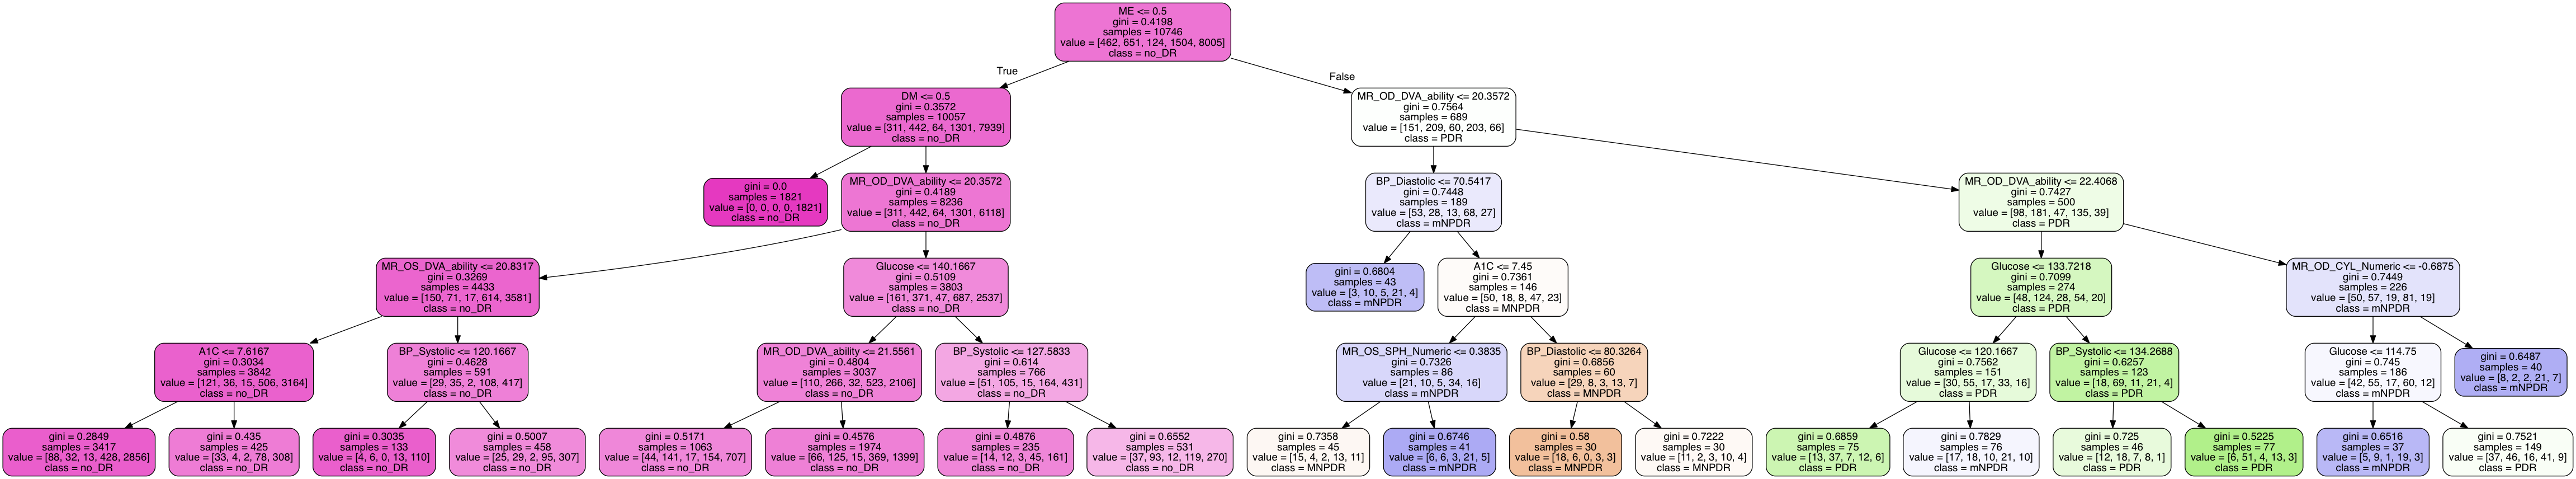

In [38]:
plot_tree(clf, X['more'])

In [39]:
sorted(zip(X['more'].columns.values,clf.feature_importances_), key = lambda x: x[1], reverse = True)

[('ME', 0.57535282838745816),
 ('DM', 0.20563874021889239),
 ('MR_OD_DVA_ability', 0.11780307168771961),
 ('Glucose', 0.032728037312163914),
 ('BP_Systolic', 0.021734045914180596),
 ('A1C', 0.014881256863391191),
 ('MR_OS_DVA_ability', 0.014288939687282318),
 ('BP_Diastolic', 0.0088377113229461401),
 ('MR_OD_CYL_Numeric', 0.0055133117995006036),
 ('MR_OS_SPH_Numeric', 0.0032220568064649652),
 ('BMI', 0.0),
 ('MR_OD_SPH_Numeric', 0.0),
 ('MR_OS_CYL_Numeric', 0.0),
 ('MR_OS_NVA_ability', 0.0),
 ('MR_OD_NVA_ability', 0.0),
 ('Glaucoma_Suspect', 0.0),
 ('Open_angle_Glaucoma', 0.0),
 ('Cataract', 0.0),
 ('Gender_F', 0.0),
 ('Gender_M', 0.0),
 ('Gender_U', 0.0),
 ('Race_Asian', 0.0),
 ('Race_Black or African American', 0.0),
 ('Race_Hispanic or Latino', 0.0),
 ('Race_Other', 0.0),
 ('Race_White', 0.0),
 ('recent_smoking_status_current every day smoker', 0.0),
 ('recent_smoking_status_current some day smoker', 0.0),
 ('recent_smoking_status_former smoker', 0.0),
 ('recent_smoking_status_heavy

## morefeature + recent_vis target

Check the unlimited-param condition (total node amount and max depth)

In [40]:
y['more_recent_vis'].value_counts()

no_DR                     12009
non_vision_threatening     2868
vision_threatening         1162
Name: recent_DR, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X['more'], y['more_recent_vis'], test_size=0.33)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
preds = clf.predict(X = X_test)
print (clf.tree_.node_count, get_max_node_depths(clf.tree_))

(4219, 38)


In [42]:
sorted(zip(X['more'].columns.values,clf.feature_importances_), key = lambda x: x[1], reverse = True)

[('ME', 0.11035345594871239),
 ('BP_Systolic', 0.10087871270800264),
 ('BP_Diastolic', 0.086476811745058529),
 ('Glucose', 0.076201082266563899),
 ('BMI', 0.060877935529142516),
 ('MR_OD_SPH_Numeric', 0.052984353565727504),
 ('MR_OS_SPH_Numeric', 0.05267376854807828),
 ('A1C', 0.048009248453715195),
 ('MR_OD_CYL_Numeric', 0.042313446495837397),
 ('DM', 0.03638866692955068),
 ('MR_OS_CYL_Numeric', 0.035192916460376616),
 ('MR_OD_DVA_ability', 0.034538183828630671),
 ('MR_OS_DVA_ability', 0.02072824408514784),
 ('MR_OS_NVA_ability', 0.017441582158152367),
 ('Cataract', 0.016128765001398926),
 ('recent_smoking_status_never smoker', 0.014468903095284411),
 ('MR_OD_NVA_ability', 0.013200115338972572),
 ('Gender_M', 0.012333689182240962),
 ('Open_angle_Glaucoma', 0.011748416859822761),
 ('family_DM_P_DM', 0.010462455406476352),
 ('Glaucoma_Suspect', 0.010003596166321214),
 ('Race_Hispanic or Latino', 0.0082598612608680688),
 ('family_G_P_G', 0.0080888049928990891),
 ('family_DM_Unknown', 0.0

Tuning the parameters and select the setting that result in relatively larger precision and smaller node amount

In [43]:
parameter_tuning(X['more'], y['more_recent_vis'], max_features = 'auto')

averaged precision 	 min_samples_leaf 	 max_depth 	 averaged node_count
0.715102784519	25	10	303.0
0.71192384805	40	10	267.8
0.711795877286	20	10	358.6
0.711733431136	45	15	346.6
0.708431186743	50	10	224.2
0.707093691301	15	5	55.8


In [44]:
parameter_tuning(X['more'], y['more_recent_vis'])

averaged precision 	 min_samples_leaf 	 max_depth 	 averaged node_count
0.735698819366	20	5	42.6
0.735297266708	15	5	45.0
0.734984064642	10	5	46.2
0.734793935818	50	5	35.4
0.733094021244	55	5	35.4
0.732940825666	25	5	41.8


In [45]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth = 5)
X_train, X_test, y_train, y_test = train_test_split(X['more'], y['more_recent_vis'], test_size=0.33)
clf = clf.fit(X_train, y_train)
preds = clf.predict(X = X_test)
print(clf.tree_.node_count, clf.n_features_)

(41, 52)


In [46]:
print(pd.crosstab(y_test, preds))
print(metrics.classification_report(y_true = y_test, y_pred=preds))

col_0                   no_DR  non_vision_threatening  vision_threatening
recent_DR                                                                
no_DR                    3936                      22                  11
non_vision_threatening    779                      92                  70
vision_threatening        237                      56                  90
                        precision    recall  f1-score   support

                 no_DR       0.79      0.99      0.88      3969
non_vision_threatening       0.54      0.10      0.17       941
    vision_threatening       0.53      0.23      0.32       383

           avg / total       0.73      0.78      0.71      5293



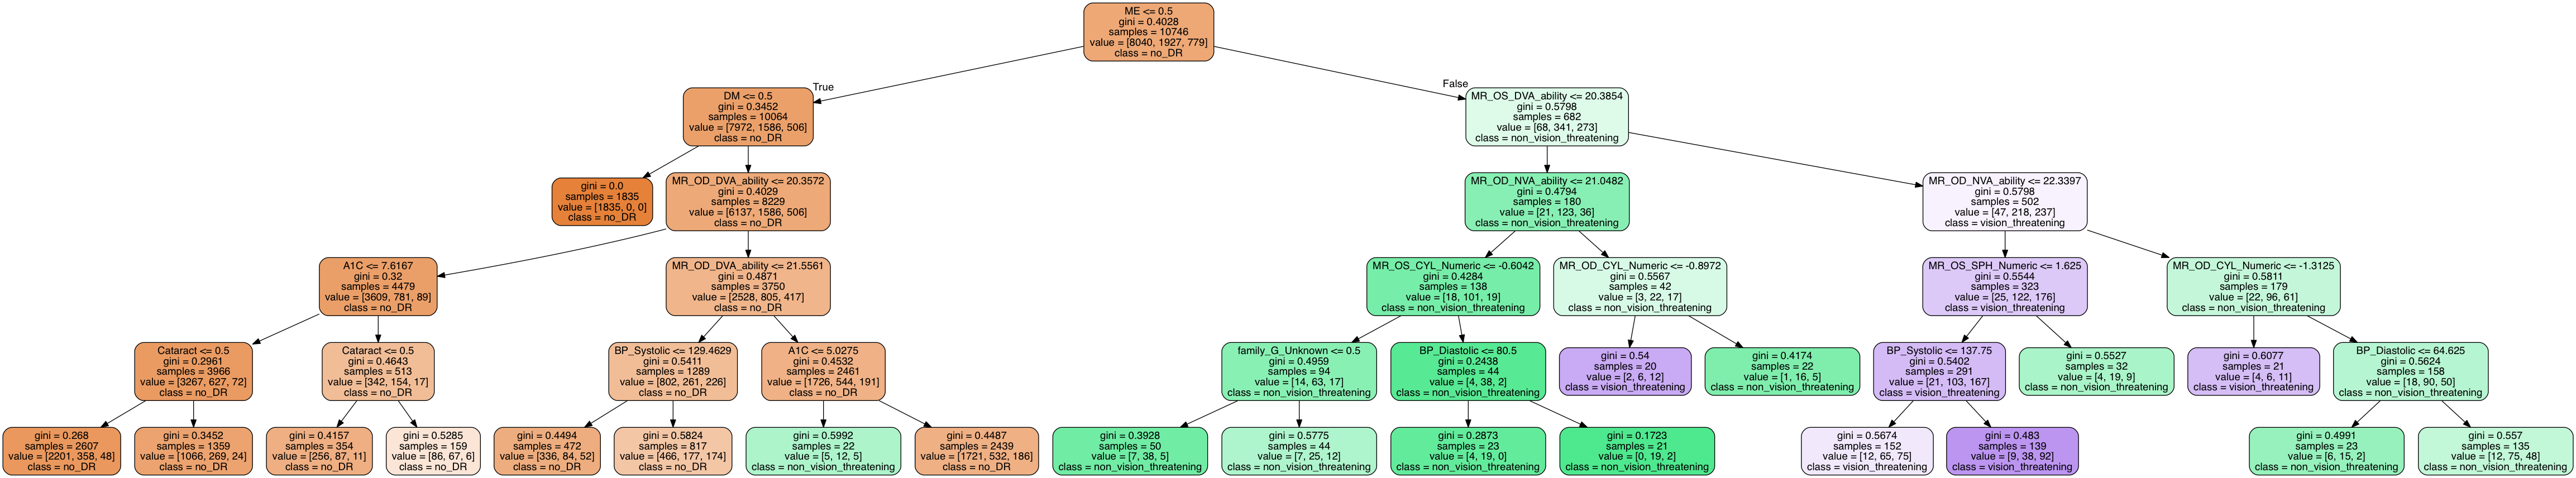

In [47]:
plot_tree(clf, X['more'])

In [48]:
sorted(zip(X['more'].columns.values,clf.feature_importances_), key = lambda x: x[1], reverse = True)

[('ME', 0.5828001428982037),
 ('DM', 0.20093500806036688),
 ('MR_OD_DVA_ability', 0.088012557604330882),
 ('A1C', 0.03591117475392832),
 ('MR_OS_DVA_ability', 0.022963526830811289),
 ('Cataract', 0.017151616919911242),
 ('BP_Systolic', 0.017001122093248177),
 ('MR_OD_NVA_ability', 0.014890744968133307),
 ('MR_OD_CYL_Numeric', 0.0073569593666560386),
 ('MR_OS_SPH_Numeric', 0.0053375332184261819),
 ('BP_Diastolic', 0.003402689539273948),
 ('MR_OS_CYL_Numeric', 0.0022476901889813615),
 ('family_G_Unknown', 0.0019892335577286701),
 ('BMI', 0.0),
 ('Glucose', 0.0),
 ('MR_OD_SPH_Numeric', 0.0),
 ('MR_OS_NVA_ability', 0.0),
 ('Glaucoma_Suspect', 0.0),
 ('Open_angle_Glaucoma', 0.0),
 ('Gender_F', 0.0),
 ('Gender_M', 0.0),
 ('Gender_U', 0.0),
 ('Race_Asian', 0.0),
 ('Race_Black or African American', 0.0),
 ('Race_Hispanic or Latino', 0.0),
 ('Race_Other', 0.0),
 ('Race_White', 0.0),
 ('recent_smoking_status_current every day smoker', 0.0),
 ('recent_smoking_status_current some day smoker', 0.0)